## IMPORT DEPENDENCIES

In [17]:
# IMPORT SQLALCHEMY DEPENDENCIES

# Python SQL toolkit and Object Relational Mapper (ORM)
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import extract


#This function's primary purpose is to set up the ability to query a SQLite database.
from sqlalchemy import create_engine, func


#IMPORT OTHER DEPENDENCIES

# Allows to see the graphs in the notebook
%matplotlib inline

#Library for visualization
#Pyplot module, a dependency that provides us with a MATLAB-like plotting framework
import matplotlib.pyplot as plt

#This will import style from Matplotlib
from matplotlib import style
style.use('fivethirtyeight')


import numpy as np
import pandas as pd

#We'll use datetime in this module because we'll need to calculate some data points that have to do with dates
import datetime as dt

## SQLalchemy

In [18]:
#Location of the SQLite database file. 
engine = create_engine("sqlite:///hawaii.sqlite")
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

#Confirm that the Automap was able to find all of the data in the SQLite database. 
#Base.classes gives us access to all the classes and keys() references all the names of the classes.
Base.classes.keys()

['measurement', 'station']

In [19]:
# Save references to each table
Measurement = Base.classes.measurement 
Station = Base.classes.station 
# Create session (link) from Python to the DB
session = Session(engine)
#query date and precipitation columns
results = session.query(Measurement.date, Measurement.prcp).all()

# Exploratory Climate Analysis

In [20]:
# Retrieving the last 12 months of precipitation data and ploting the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()


In [21]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
df.head()

,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-24,2016-08-24,0.08
2016-08-25,2016-08-25,0.08
2016-08-26,2016-08-26,0.00
2016-08-27,2016-08-27,0.00


In [26]:
df = df.sort_index()

In [29]:
df_clean=df.to_string(index=False)

Text(0.5, 1.0, 'Precipitation in the last year for all the Meteorological Stations')

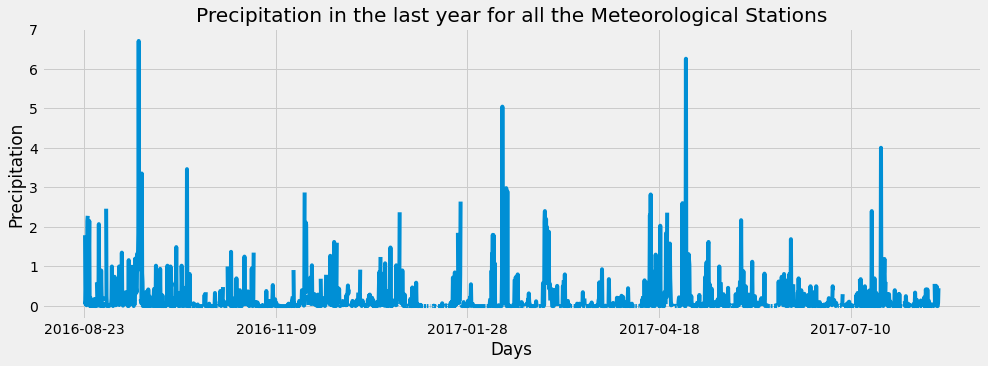

In [30]:
# Use Pandas Plotting with Matplotlib to plot the data

df.plot(figsize=(15,5), legend=None)
plt.xlabel("Days")
plt.ylabel("Precipitation")
plt.title("Precipitation in the last year for all the Meteorological Stations")

In [31]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [32]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [33]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [34]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature in the most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

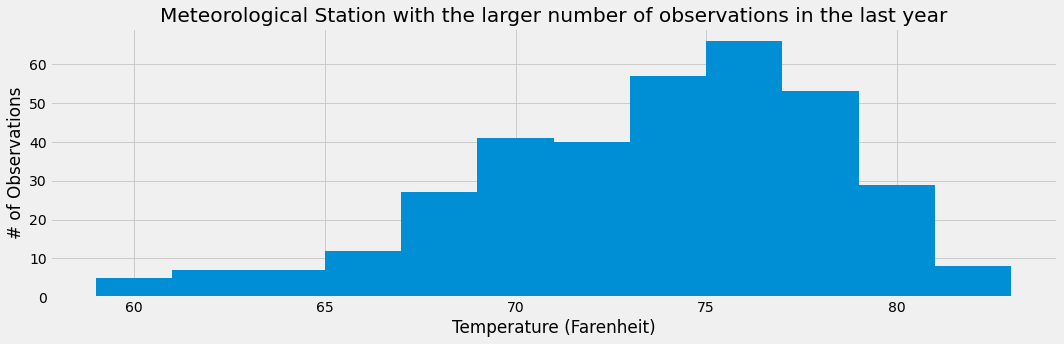

In [35]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12, figsize=(15,5), legend=None)
plt.xlabel("Temperature (Farenheit)")
plt.ylabel("# of Observations")
plt.title("Meteorological Station with the larger number of observations in the last year")
plt.tight_layout()


## SUMMARY STATISTICS FOR JUNE AND DECEMBER

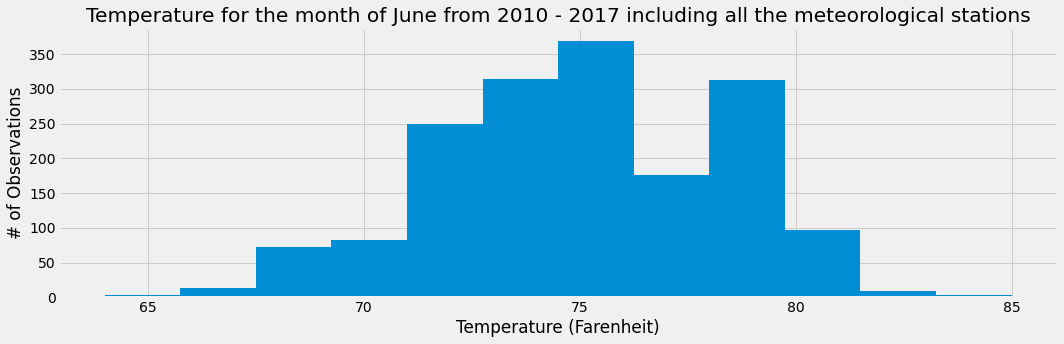

In [36]:
#Temperatures for June. 
results = session.query(Measurement).filter(extract('month',Measurement.date) == 6)

# Convert the June temperatures to a list.
results_list = [temp.tobs for temp in results]

# DataFrame from the list of temperatures for June. 
df = pd.DataFrame(results_list, columns=['June Temp'])

#df.plot.hist()

df.plot.hist(bins=12, figsize=(15,5), legend=None)
plt.xlabel("Temperature (Farenheit)")
plt.ylabel("# of Observations")
plt.title("Temperature for the month of June from 2010 - 2017 including all the meteorological stations")
plt.tight_layout()

In [37]:
# Summary statistics for the June temperature
df.describe()

,June Temp
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


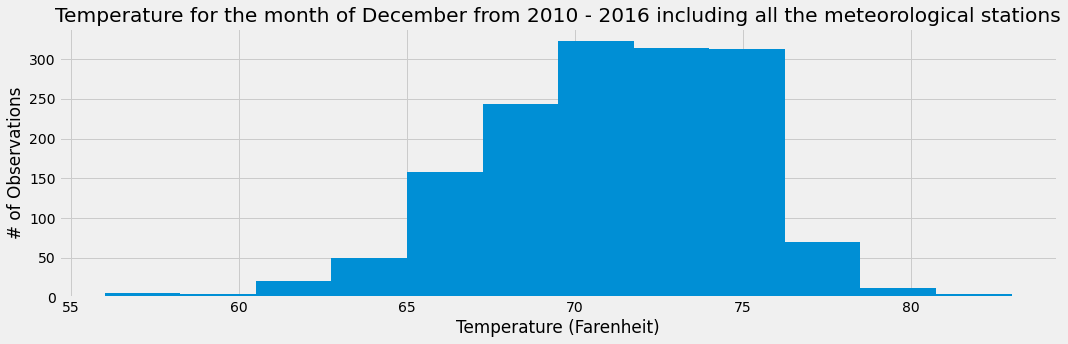

In [38]:
#Temperatures for December. 
results = session.query(Measurement).filter(extract('month',Measurement.date) == 12)

# Convert the June temperatures to a list.
results_list = [temp.tobs for temp in results]

# DataFrame from the list of temperatures for June. 
df = pd.DataFrame(results_list, columns=['Dec Temp'])
df.plot.hist(bins=12, figsize=(15,5), legend=None)
plt.xlabel("Temperature (Farenheit)")
plt.ylabel("# of Observations")
plt.title("Temperature for the month of December from 2010 - 2016 including all the meteorological stations")
plt.tight_layout()

In [39]:
# Summary statistics for the December temperature
df.describe()

,Dec Temp
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [41]:
# Precipitation
results= []
results = session.query(Measurement.prcp).all()

In [42]:
df = pd.DataFrame(results)
df.head()

,prcp
0,0.08
1,0.00
2,0.00
3,0.00
4,NaN


In [43]:
df_clean = df.dropna()
df_clean.head()

,prcp
0,0.08
1,0.00
2,0.00
3,0.00
5,0.06


In [44]:
df_clean.describe()

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


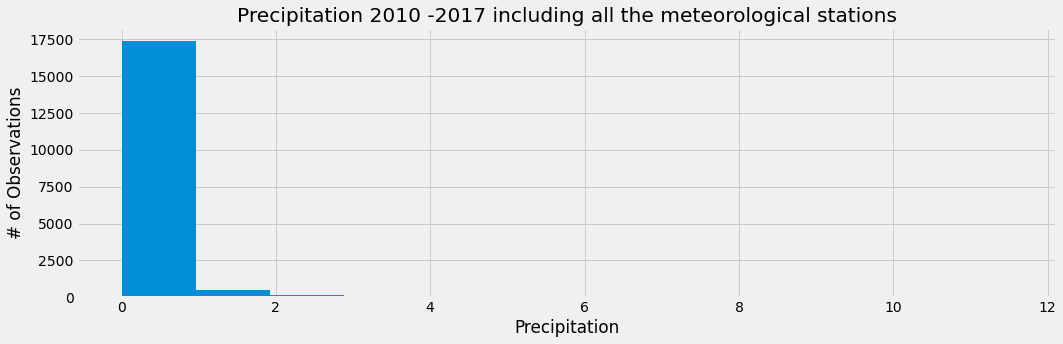

In [45]:
df_clean.plot.hist(bins=12, figsize=(15,5), legend=None)
plt.xlabel("Precipitation")
plt.ylabel("# of Observations")
plt.title("Precipitation 2010 -2017 including all the meteorological stations")
plt.tight_layout()